(891, 12)
   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked  
0    male  22.0      1      0   7.2500        S  
1  female  38.0      1      0  71.2833        C  
2  female  26.0      0      0   7.9250        S  
3  female  35.0      1      0  53.1000        S  
4    male  35.0      0      0   8.0500        S  
Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.002245
dtype: float64


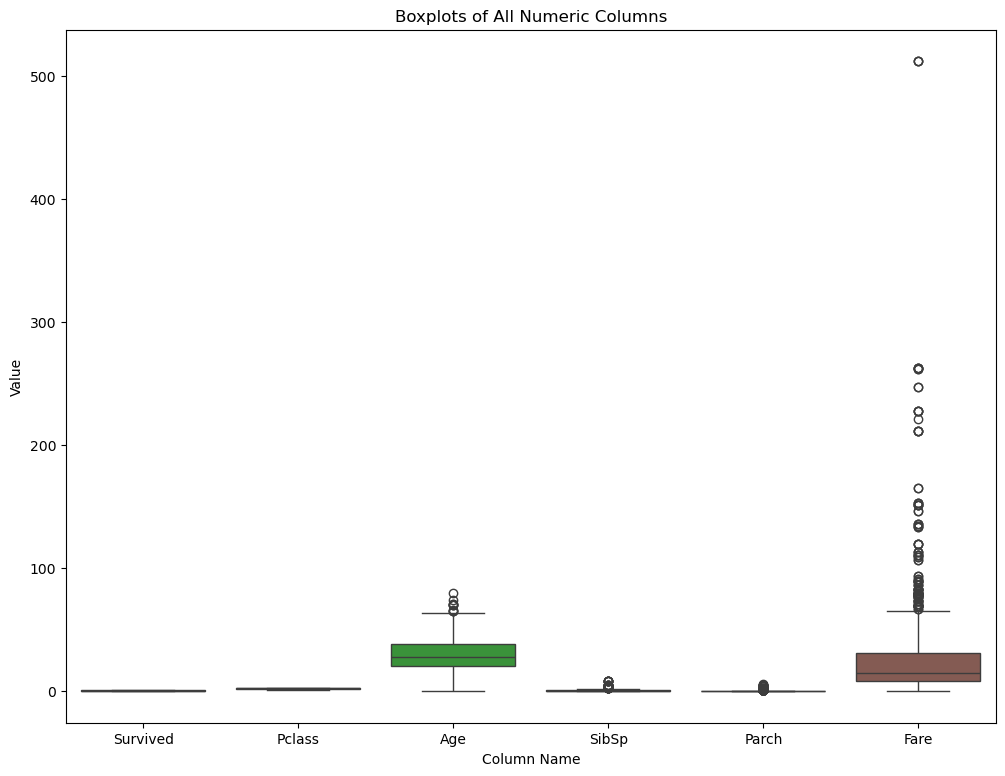

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#读取数据
df = pd.read_csv('titanic.csv')
print(df.shape)
# 删除重复行
df= df.drop_duplicates()
# 删除不相关的列
columns_to_drop = ['PassengerId', 'Ticket', 'Cabin']
df = df.drop(columns=columns_to_drop)
print(df.head())

# 计算每列缺失值数量
missing_count = df.isnull().sum()
# 计算每列缺失值比例
missing_ratio = missing_count / len(df)
print(missing_ratio)

#绘制所有数据的箱线图
fig, ax = plt.subplots(figsize=(12, 9))
numeric_columns = df.select_dtypes(include=['number']).columns
sns.boxplot(data=df[numeric_columns], ax=ax)
ax.set_title('Boxplots of All Numeric Columns')
ax.set_xlabel('Column Name')
ax.set_ylabel('Value')
plt.show()

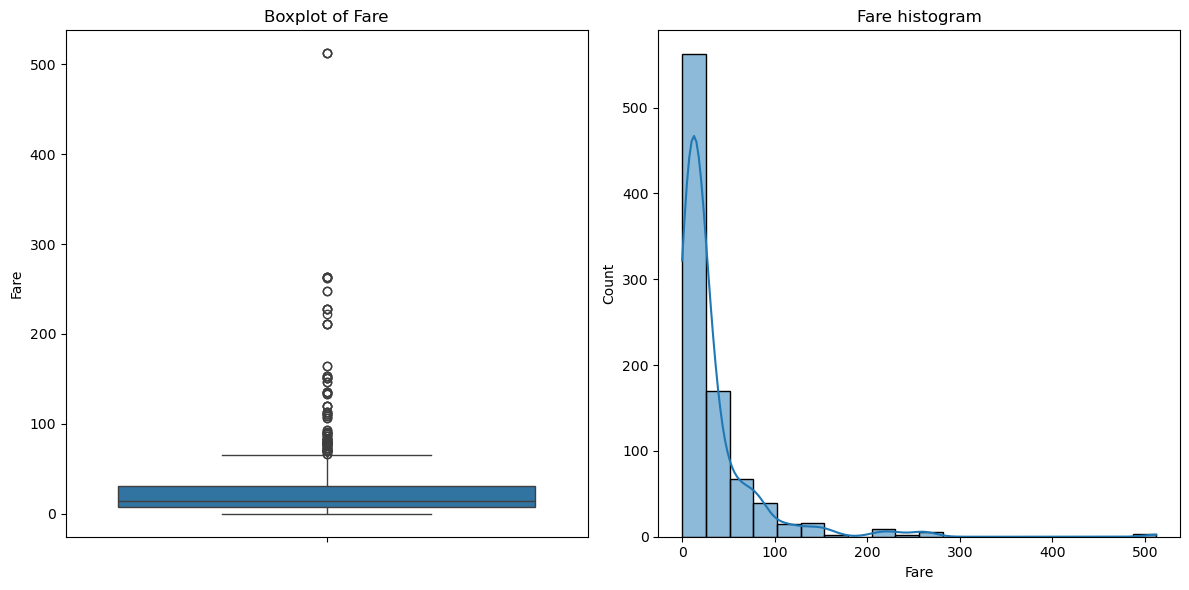

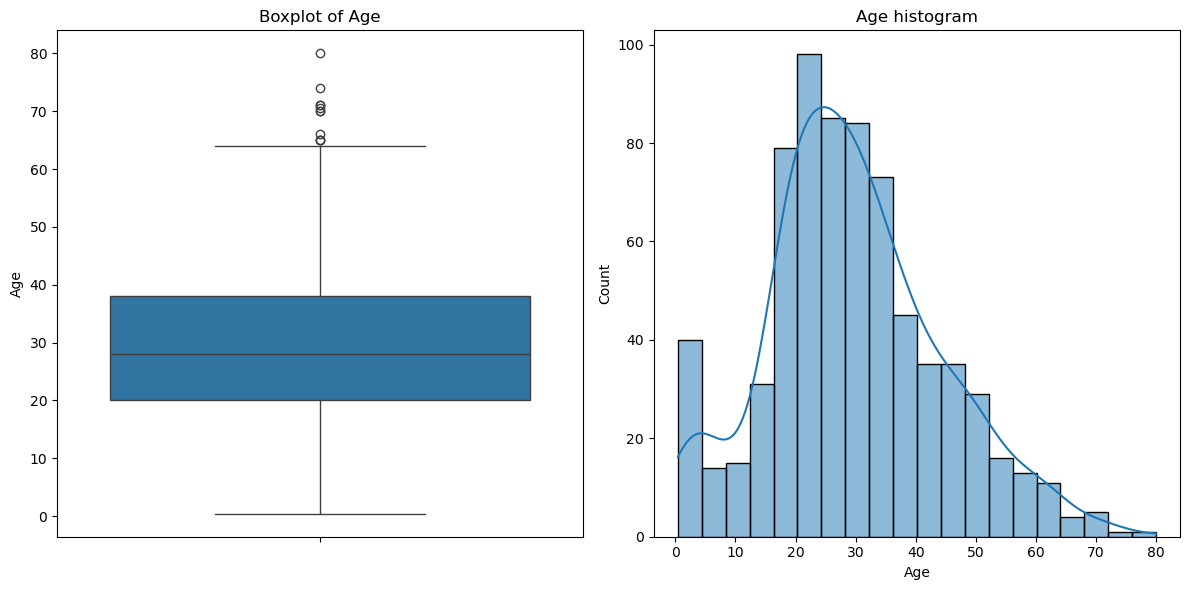

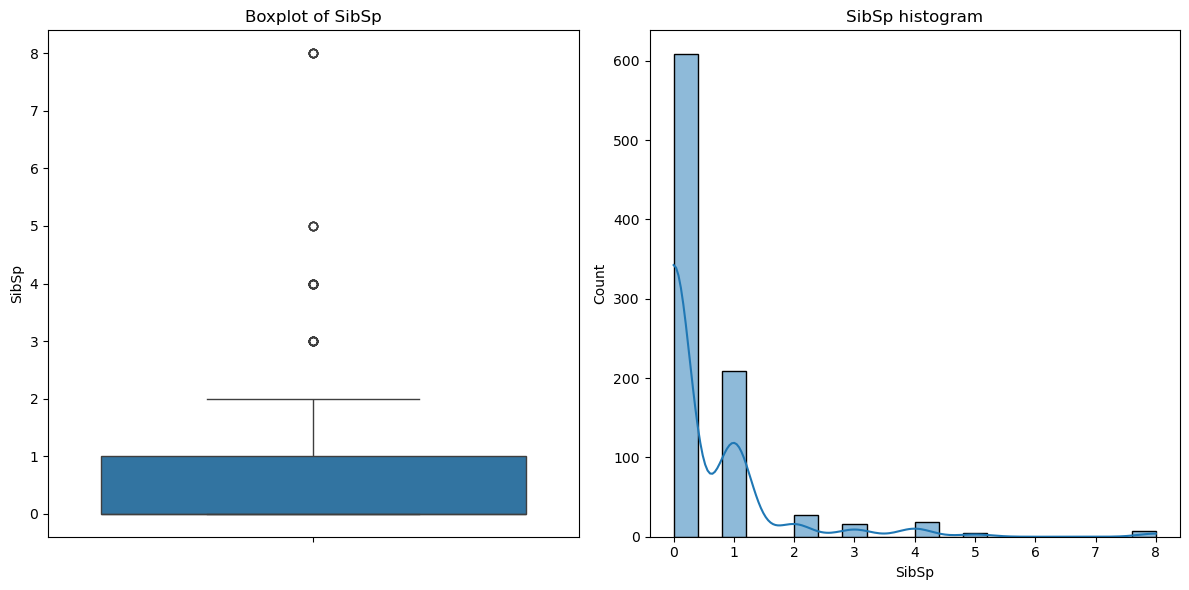

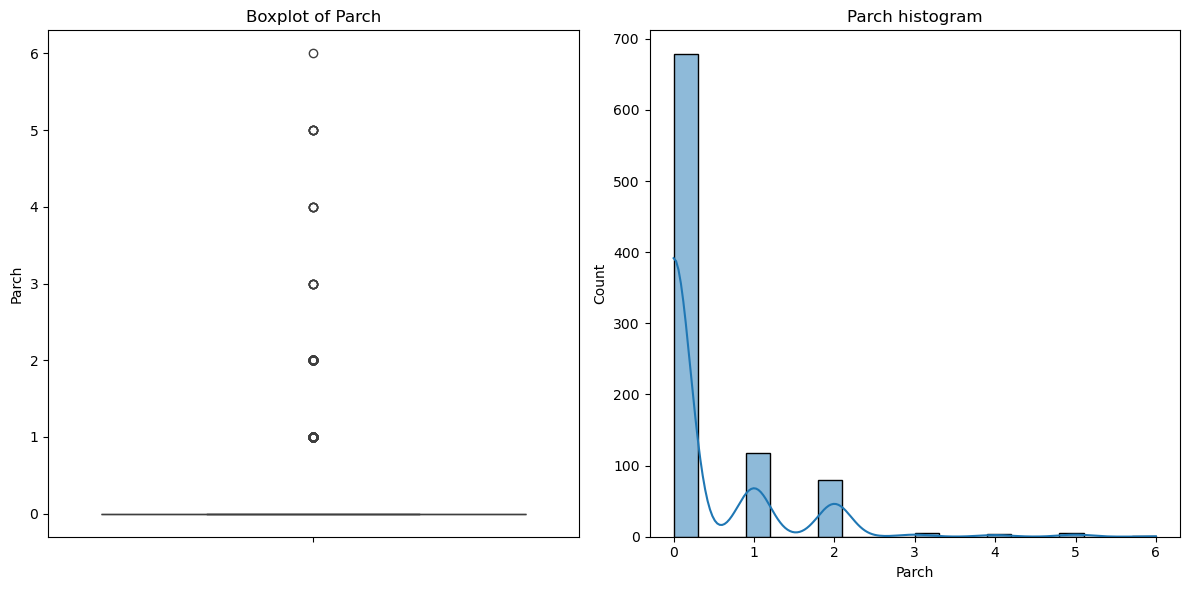

In [77]:
#展示Fare列的数据分布,以查看如何处理异常值
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 绘制箱线图
sns.boxplot(data=df['Fare'], ax=axes[0])
axes[0].set_title('Boxplot of Fare')
# 绘制直方图
sns.histplot(df['Fare'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Fare histogram')
plt.tight_layout()# 自动调整子图布局
plt.show()

#展示Age列的数据分布,以查看如何处理异常值
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 绘制箱线图
sns.boxplot(data=df['Age'], ax=axes[0])
axes[0].set_title('Boxplot of Age')
# 绘制直方图
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Age histogram')
plt.tight_layout()# 自动调整子图布局
plt.show()

#展示SibSp列的数据分布,以查看如何处理异常值
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 绘制箱线图
sns.boxplot(data=df['SibSp'], ax=axes[0])
axes[0].set_title('Boxplot of SibSp')
# 绘制直方图
sns.histplot(df['SibSp'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('SibSp histogram')
plt.tight_layout()# 自动调整子图布局
plt.show()

#展示Parch列的数据分布,以查看如何处理异常值
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# 绘制箱线图
sns.boxplot(data=df['Parch'], ax=axes[0])
axes[0].set_title('Boxplot of Parch')
# 绘制直方图
sns.histplot(df['Parch'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Parch histogram')
plt.tight_layout()# 自动调整子图布局
plt.show()

In [78]:
#处理异常值
# 使用四分位距（IQR）方法处理异常值
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
# 处理空缺数据
# 对 'Age' 列使用中位数填充
df['Age'] = df['Age'].fillna(df['Age'].median())
# 对 'Embarked' 列使用众数填充
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
if 'Age' in df.columns:
    df = df[df['Age'] % 1 == 0]

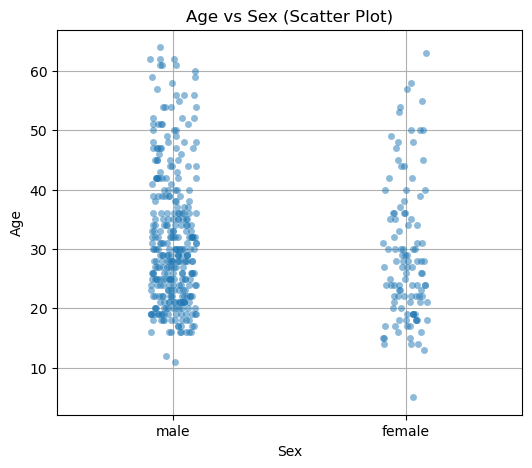

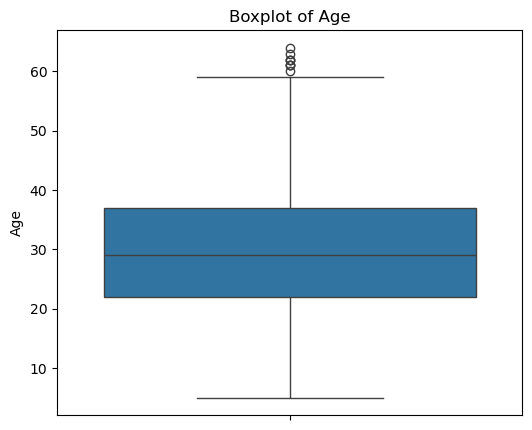

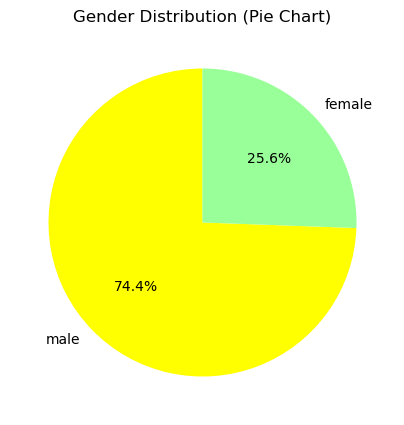

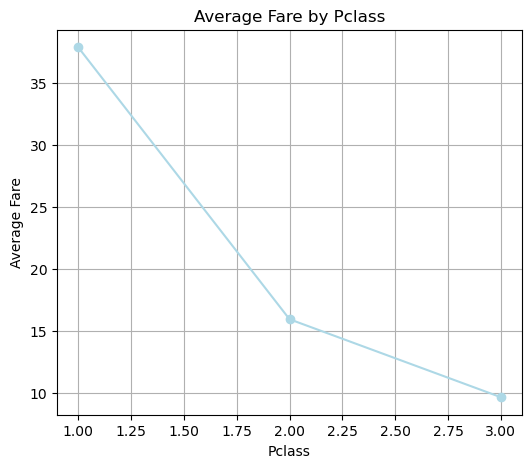

In [45]:
# 画散点图
plt.figure(figsize=(6, 5))#(宽度,高度)
sns.stripplot(x='Sex', y='Age', data=df, jitter=True, alpha=0.5)#(x轴，y轴，数据来源，添加一些随机的抖动，这样可以避免数据点在分类轴上重叠,透明度)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Age vs Sex (Scatter Plot)')
plt.grid(True)
#显示图形
plt.show()
# 绘制箱线图，帮助你查看某列数据的分布和异常值
if 'Age' in df.columns:
    plt.figure(figsize=(6, 5))
    sns.boxplot(y=df['Age'])
    plt.title('Boxplot of Age')
    plt.show()
# 饼图 
# 计算每个性别的数量
sex_counts = df['Sex'].value_counts()
# 绘制饼图
plt.figure(figsize=(5, 5))
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FFFF00','#99ff99'])#(类型,每个扇形上显示其占总体的百分比,指定饼图的起始角度为 90 度,颜色)
plt.title('Gender Distribution (Pie Chart)')
plt.ylabel('')  # 去掉 ylabel
plt.show()
#折线图 
avg_fare_by_class = df.groupby('Pclass')['Fare'].mean()
# 绘制折线图
plt.figure(figsize=(6, 5))
avg_fare_by_class.plot(kind='line', marker='o', color='#ADD8E6')#(折线图,圆形，颜色）
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.grid(True)#网格
plt.show()